## Another attempt to solve problem

We will consider the state 3-d vector 
$$ s_t = [p_t, x_t, t] $$
where $p_t$ is price at time t, $x_t$ stocks available to liquidate and $t$ is time.
We will consider the value function as the linear function as
$$V(s_t, \theta) = \theta_1\phi_1(p_t) + \theta_2\phi_2(x_t) + \theta_3\phi_3(t) + \theta_4 $$
Hence we need $\theta = [\theta_1,\theta_2,\theta_3,\theta_4] $ as parameters for value function.

Simlarlry we will consider the paramtric form of policy fiunction which will again depend on price, time, and avaibale stocks to sell, so similar function for the policy and vector of parameters go like $ \nu = [\nu_1,\nu_2,\nu_3,\nu_4] $

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
% %matplotlib inline

In [42]:
def getNewState(s_t, u_t):
    s_ = [0,0,0]
    if u_t < 4 or s_t[0] < 3.0:
        s_[1] = max(s_t[1]-u_t, 0) 
        s_[0] = s_t[0]
    elif u_t <= 40:
        s_[0] = s_t[0]*(1-0.0008*u_t)
        s_[1] = max(s_t[1]-u_t, 0) 
    else:
        s_[0] = s_t[0]*(1- 0.01*np.log(u_t))
        s_[1] = max(s_t[1]-u_t, 0) 
    reward = u_t*s_[0]
    #print(reward, s_[0])
    s_[0] = s_[0] + np.random.normal(0,1)
    s_[2] = s_t[2] + 1
    #print(u_t)
    return (reward, s_)

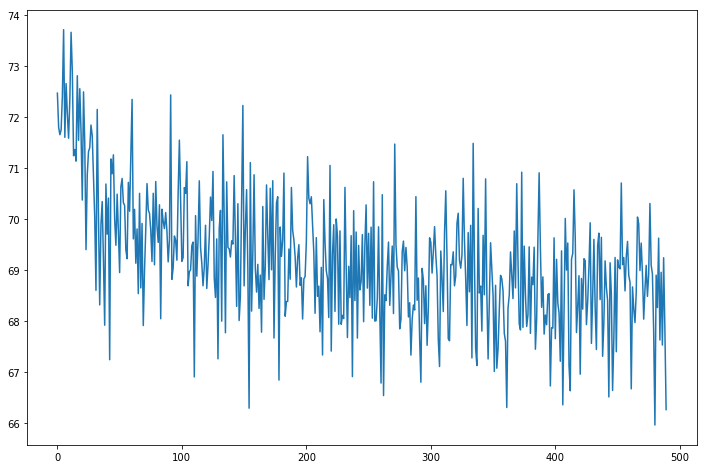

In [28]:
s_t = [71, 1000, 1]
prices = [getNewState(s_t, u_t)[1][0] for u_t in range(10, 500) ]
#print(prices)
plt.figure(figsize=(12,8))
plt.plot(prices)

In [29]:
def getAction(s_t, param):
    return (0.01*s_t[1]*s_t[0]*(1-np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))))/(T-np.sqrt(s_t[2]))

In [30]:
def getGradient(s_t, param):
    return (0.01*s_t[1]*s_t[0]*np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))/(T-np.sqrt(s_t[2])))

In [45]:
alpha_a = 0.01
alpha_c = 0.01
lammbda = 0.00001

# lets initilize the parameterrs of policy as well as value function
param = np.random.random()
theta = np.random.random(3)
T = 20
for i in range(1000):
    z = [0.0,0.0,0.0] 
    # initialize the state s0
    s_t = [np.random.random()*100, int(np.random.random()*1000), 0]
    #print('u :',s_t[1])
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            delta_t = reward + s_t[0]*s_t[1] - np.dot(theta, s_t)
        else:
            u_t0 = np.random.normal(5,5)
            u_t = int(getAction(s_t, param) + u_t0)
            (reward, s) = getNewState(s_t, u_t)
            s__ = np.subtract(s , s_t)
            #s__[1] = s__[1]/1000 
            #s__[0] = s__[0]/1000
            #s__[2] = s__[2]/1000
            delta_t = reward + np.dot(theta,s__ )
            #print(delta_t, reward)
        #print(s, s_t)
        gad = getGradient(s_t, param)
        #print('gad\t', gad)
        param = param + alpha_a*delta_t*u_t0*gad
        z = [a/100 for a in s_t] + np.multiply(lammbda, z)
        #print('z\t', z)
        theta = theta + np.multiply(alpha_c*delta_t, z)      
        print('theta\t', theta)
        s_t = s
        t = t+1
    #print(param)

theta	 [  2.34927565  19.63734455   0.25703811]
theta	 [  3.24969058  30.2658064    0.2795082 ]
theta	 [  3.70643505  35.3404935    0.30147643]
theta	 [  4.13121213  39.96727      0.33218501]
theta	 [  4.13153267  39.97067971   0.33221651]
theta	 [  4.13548727  40.01151135   0.33270965]
theta	 [  4.07925631  39.43882653   0.32432891]
theta	 [  3.91202032  37.75463425   0.29409987]
theta	 [  3.91536486  37.78689421   0.29480888]
theta	 [  3.92185549  37.84666026   0.29632408]
theta	 [  3.90248773  37.66930541   0.29119822]
theta	 [  3.89489006  37.60144934   0.28897011]
theta	 [  3.91398628  37.76926166   0.29509092]
theta	 [  3.9421025   38.00549963   0.30451144]
theta	 [  3.94086202  37.99538702   0.304062  ]
theta	 [  3.90410046  37.69763249   0.28941834]
theta	 [  3.84917878  37.24802201   0.26519693]
theta	 [  3.767932    36.590482     0.22651814]
theta	 [  3.73249687  36.3147276    0.20859909]
theta	 [  2.09776514  23.38997055  -0.69423256]
theta	 [  7.6694221   34.02967303  -0.69

In [46]:
param = np.random.random()
theta = np.random.random(4)
T = 20
#for i in range(1000):
value = 0.0
s_t = [np.random.random()*100, int(np.random.random()*1000), 1, 1]
print(s_t)
t = 0
while t < T and s_t[1] > 0:
    if t == T-1:
        #u_t = s_t[1]
        value += s_t[0]*s_t[1]
    else:
        #u_t0 = np.random.normal(5,5)
        u_t = int(getAction(s_t, param))
        (reward, s) = getNewState(s_t, u_t)
        value += reward
        print(u_t, value, s_t[0])
    s_t = s
    t = t + 1
print(s_t[1], value, u_t)

[74.22559807639966, 934, 1, 1]
3 222.676794229199 74.22559807639966
4 519.3595633004909 74.40880042919642
4 813.9743992761677 73.89015749791251
4 1108.242644556243 73.8032316613351
4 1402.3289866893927 73.75760988491915
4 1694.1081824535183 73.17897165031243
4 1978.4857002724798 71.3226118125405
4 2261.4708941035183 70.97341338057751
4 2542.7698999528507 70.55051310426676
4 2823.31910491775 70.36246111679851
4 3099.721762465568 69.32249637535568
4 3376.392332865576 69.38968960674352
4 3658.069774359598 70.64542573586017
4 3945.2755602429556 72.03194870670087
4 4226.024272559436 70.41249807295348
4 4509.368639260971 71.06349485893209
4 4789.74580493839 70.31931322166419
4 5074.069132932952 71.30902086540964
4 5365.6865288894505 73.1383918430222
859 68530.12979158592 4


In [31]:
# lets follow the above generated policy and value function and see howit comes out

s_t = [np.random.random()*100, 1000, 0]
for t in range(T):
    while t < T and s_t[1] > 0:
    if t == T-1:
        u_t = s_t[1]
        value += u_t*s_t[0]
    else:
        u_t = int(getAction(s_t, param))
        value += 
    

array([ nan,  nan,  nan,  nan])

Ref : Solutions to Finite Horizon Cost Problems Using Actor-Critic Reinforcement Learning Ivo Grondman et. al

http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6706755